## Документация

Для оформления документации - выберем формат плейбука Тут наглядно можно показать и данные и примеры

задача 
- выбор технической и бизнес метрики
- проанализировать входные данные. Сгенерировать новые признаки по входным данным. Построить коррреляцию между признаками
- выбор технической и бизнес метрики
- поиск моделей с поиском гиперпараметров
- обёртываение лучшей модели в docker-контейнер 

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn  as sns

In [2]:
data = pd.read_pickle( '.././data/modify/user.pkl')
data

,date,userID,itemID,rating,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,2015-06-02 05:02:12.117,257597,355908,0,5,1,2,6,2015,153,2
1,2015-06-08 22:00:21.247,257597,302696,0,22,0,2,6,2015,159,8
5,2015-06-02 05:50:14.164,992329,248676,0,5,1,2,6,2015,153,2
6,2015-06-02 05:57:52.007,992329,193150,0,5,1,2,6,2015,153,2
7,2015-06-02 06:12:35.976,992329,246453,0,6,1,2,6,2015,153,2
...,...,...,...,...,...,...,...,...,...,...,...
4864551,2015-08-01 03:13:05.939,591435,261427,0,3,5,3,8,2015,213,1
4864552,2015-08-01 03:30:13.142,762376,115946,0,3,5,3,8,2015,213,1
4864553,2015-08-01 02:57:00.527,1251746,78144,0,2,5,3,8,2015,213,1
4864554,2015-08-01 03:08:50.703,1184451,283392,0,3,5,3,8,2015,213,1


In [3]:
items = pd.read_pickle( '.././data/modify/item.pkl')
items

,itemid,prop,lenProp,popular
0,206783,"[6, 16, 112, 159, 202, 339, 364, 389, 450, 520...",40,0
1,395014,"[6, 202, 210, 230, 364, 400, 678, 698, 764, 77...",40,0
2,59481,"[6, 28, 112, 120, 202, 283, 431, 550, 591, 678...",40,0
3,156781,"[6, 202, 376, 483, 689, 698, 764, 839, 917]",40,0
4,89534,"[6, 28, 38, 112, 202, 213, 243, 283, 364, 434,...",40,0
...,...,...,...,...
417048,285800,"[159, 283, 776, 790, 928]",40,0
417049,88782,"[6, 112, 159, 764, 776, 797, 888]",40,0
417050,427087,"[283, 364, 764, 790]",40,0
417051,351978,"[227, 776, 839, 917, 1021]",40,0


Небольшое описание взимосвязей свойст товаров

In [5]:
data_plot = data.drop(['date'], axis=1).copy()
data_plot

,userID,itemID,rating,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,257597,355908,0,5,1,2,6,2015,153,2
1,257597,302696,0,22,0,2,6,2015,159,8
5,992329,248676,0,5,1,2,6,2015,153,2
6,992329,193150,0,5,1,2,6,2015,153,2
7,992329,246453,0,6,1,2,6,2015,153,2
...,...,...,...,...,...,...,...,...,...,...
4864551,591435,261427,0,3,5,3,8,2015,213,1
4864552,762376,115946,0,3,5,3,8,2015,213,1
4864553,1251746,78144,0,2,5,3,8,2015,213,1
4864554,1184451,283392,0,3,5,3,8,2015,213,1


In [8]:

data_plot[data_plot['rating'] == 1]

,userID,itemID,rating,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
107,287857,5206,1,5,1,2,6,2015,153,2
117,158090,10572,1,4,1,2,6,2015,153,2
120,158090,10572,1,5,1,2,6,2015,153,2
135,1213673,343861,1,5,1,2,6,2015,153,2
182,1076270,262799,1,5,1,2,6,2015,153,2
...,...,...,...,...,...,...,...,...,...,...
4864411,831605,57810,1,3,5,3,8,2015,213,1
4864511,10670,419736,1,3,5,3,8,2015,213,1
4864529,144106,141241,1,3,5,3,8,2015,213,1
4864533,804736,447661,1,3,5,3,8,2015,213,1


<Axes: >

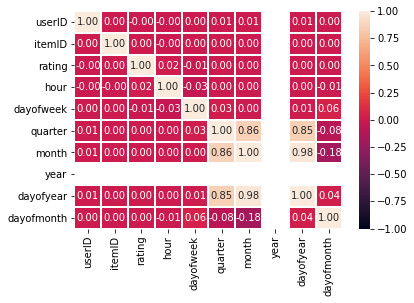

In [6]:
sns.heatmap(data_plot.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidths=0.1)

Как видно из результатов графика, корреляция низка. Данных, которые были представлены, для построения модели недостаточно!

### Валидация и метрики

Для валидации исходный датасет разделим на тестовую и тренировочную выборку по дате!

dateEnd = datetime.datetime(year=2015, month=7, day=2, hour=0, minute=0, second=0)

dataTrain = data_log[data_log['date'] < dateEnd]

dataTest = data_log[data_log['date'] >= dateEnd]



По факту  в данной задаче решаеться класическая задача бинарной классификации! (0 - просмотр товара 1 - покупка/добавление карты) Поэтому  в качестве метрики будет точность классификации (accuracy_score) , а в качестве бизнес - метрики precision@3

Были проведены ряд экпериментов оценки этих метрик для разных алгоримов. В таблице ниже представлены результаты: 

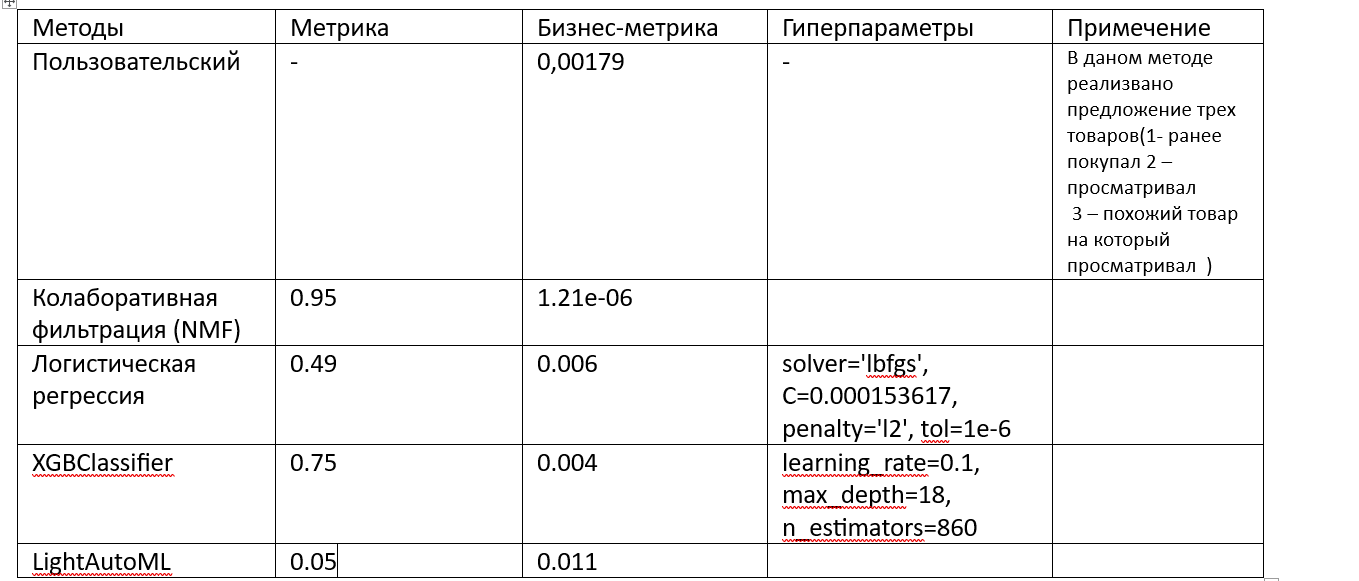


В сооветствие с этим будем использовать модель LightAutoML, точность распознавания не очень хорошая НО зато бизнес метрика на уровне!

Вообще мы столкнулись с задачей в которой  недостаточно данных. И сама задача предсказания покупки посталена некорректно (не хватает класса что пользователь проигнорировал товар)


Модель LightAutoML которая использовалась

    task = Task('binary', metric='accuracy')
    roles = {'target': 'rating','drop': ['date']}

    automl = TabularAutoML(task=task,timeout=800, cpu_limit=4,
                           general_params={'use_algos': [['linear_l2', 'lgb', 'lgb_tuned', 'cb']]})

Вообще по анализу данных можно сделать вывод что данных недостаточно! Поэтому применять более сложные модели типа 
deepCTR я не стал. Свойства товаров тоже не очень понятно как использовать - я попоробывал использовать их для 
поиска близких товаров - но это не дало результат!

#  docker

Образ собирался с помощью docker-compose. На рисунке виден адресс стороки запроса

Команда для запуска docker-compose up -d

на фото ниже пример документации сервера
Показы два метода
1.  /items/5 - получение предсказаний 

Запрос http://192.168.197.130:8000/items/5

Ответ  {"code":1,"error":"","items":"137697,198903,237422"}

2. /metrics - получение метрик
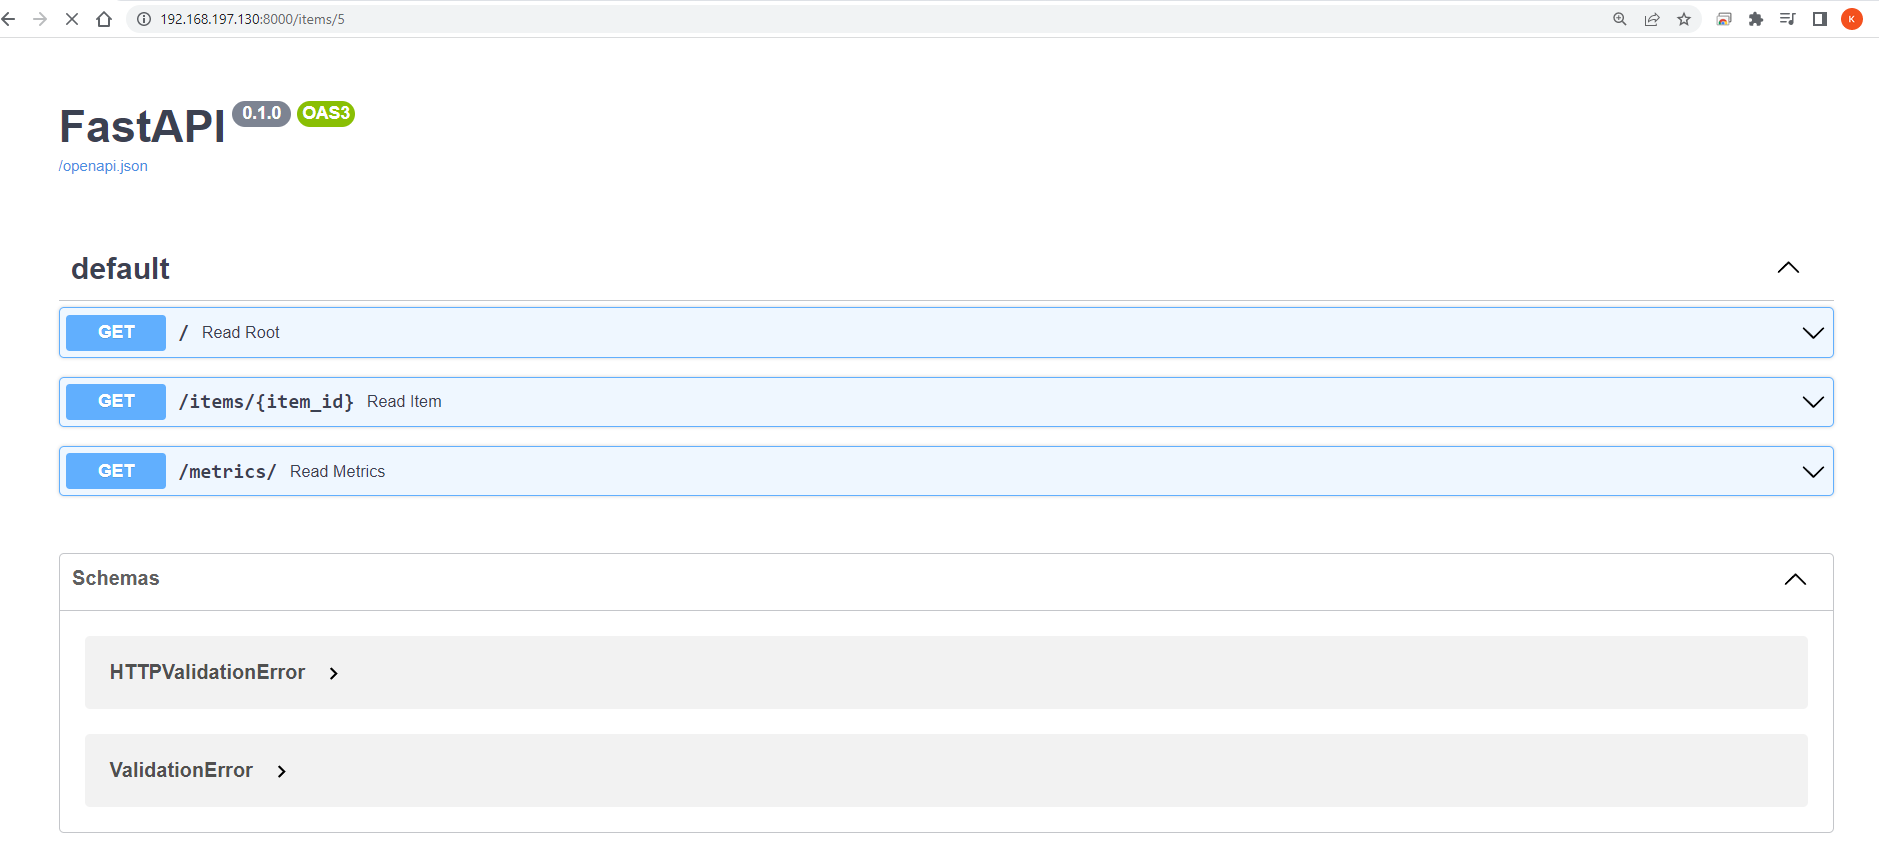

Сам исполняемый файл и стрктура контейнера представлена на гитхабе!

## Общий вывод!

Общая задача состояла в построении модели, позволяющей пресказывать покупки пользоватем определенных товаров.
На главное странице показывалось три товара  - бизнес метрика presition@3

Анализ данных показал что данных не так много и использовать мы можем только данные логов действие пользователей

Задача по сути бинарной классификации! Но если упростить задачу - по факту существуют методики анализа кликов 
пользователей (пример deepCTR),важно не только анализировать нажал ли он на просмотр, купил или добавил карту,
НО то что пользователь не среагировал тоже являеться признаком!

Однако с существующими данными сложно стороить более сложные модели! Поэтому были построены пройстейшие модели!


Главный ввод:
Построенная модель LightAutoML существенно лучше даже колаборативной фильтрации, лучше чем ручной кастомизация ! 